# Low-rank image approximation using SVD

Low-rank approximations are used in image compression, noise reduction, and pattern discovery. In this notebook, we demonstrate that even with a small number of singular values, we can reconstruct a surprisingly accurate version of an image—thus saving storage while preserving quality.


### What is the SVD ?
For a matrix $ A \in \mathbb{R}^{m \times n} $ with $r$ the *rank* of $A$ ($rk(A)=r$), the SVD factorizes it as:

$$
A = U \Sigma V^\top
$$

- $ U $: Left singular vectors (orthonormal, $( m \times m $))
- $( \Sigma $): Diagonal matrix with singular values $( \sigma_1, \ldots, \sigma_r $ and the other diagonal entries are null values)
- $( V $): Right singular vectors (orthonormal, $( n \times n $))

We can express this SVD decomposition as a sum of vectors and values as :
$$
A=\sum_{i=1}^{r} \sigma _i u_i v_i^\top
$$
with $u_i v_i^\top$ being the outer product of the $i$-th left and right singular vectors, forming a rank-1 matrix of shape $m \times n$.

**IMPORTANT** :
NumPy will return the $U$ ,$\Sigma$ and $V$ with respectively the following dimensions : $m \times r$ , 1D array of length $r$ and $r \times n$ . This is called the *reduced SVD* and it is used since it keeps only the significant non nul singular values
#### What is Low-Rank Approximation ?

A rank-*k* approximation of A is:

$$
\hat{A}(k) = \sum_{i=1}^{k} \sigma_i u_i v_i^\top
$$

This retains only the most important *k* features of the data, minimizing error in the spectral norm.

#### Why It Works

By Eckart–Young theorem:
- $ \hat{A}(k) $ is the best approximation of $ A $ among all rank-*k* matrices (in spectral norm).
- We can also get the *"how much error we introduce if we approximate $A$ using a rank-*k* approximation"* :
$$
||A-\hat{A}(k)||_2=\sigma_{k+1}
$$
With
$$
\|\mathbf{A}\|_2 := \max_{\mathbf{x}} \frac{\|\mathbf{A}\mathbf{x}\|_2}{\|\mathbf{x}\|_2}
$$
called the *spectral norm of $A$* and it represents how long any vector $x$ can become when multiplied by $A$

---

### Next Steps

Now that we've covered the theory, we'll:
1. Load and convert a grayscale image into a matrix
2. Compute its SVD
3. Visualize low-rank approximations for different k values
4. Analyze compressions and making conclusions

## 1.Loading the image and converting it from a grayscale image into into a matrix

We have used `PIL` (`Python Imaging Library`) , a lib used for opening , manipulating images and most importantly **to turn our image into a matrix of pixel values**.
This allowed us to convert the image first into a grayscale 2D array instead of 3D *(height x width instead of height x width x RGB color)* that each entry of the array/matrix has a value from 0 to 255 expressing the grayscaled color

Image matrix shape: (408, 612)


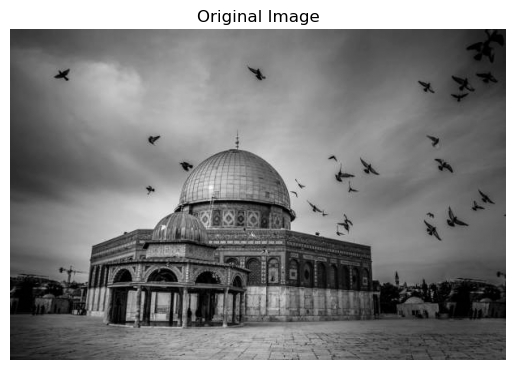

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Loading and convertion
img=Image.open("../assets/al_aqsa_image.jpg").convert("L")
A=np.array(img)

print(f"Image matrix shape: {A.shape}")

# Displaying
plt.imshow(A, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


## 2. SVD computing

Now , we used the built in function to get the $U$, $\Sigma$ *(here denoted S)* and $V^\top$.
The program here provides the $\Sigma$ matrix in form of a 1D array for efficiency reasons
Now , as we said in the beginning :
*NumPy will return the $U$ ,$\Sigma$ and $V$ with respectively the following dimensions : $m \times r$ , 1D array of length $r$ and $r \times n$ . This is called the *reduced SVD* and it is used since it keeps only the significant non nul singular values*
But , we can get the full and real SVD if we set `full_matrices=True`
*An implementation from scatch for the SVD is planned to be done soon*

In [8]:
U,S,Vt =np.linalg.svd(A)
print("The top 5 singular matrices are:")
print(S[:5])
print("U shape : ",U.shape)
print("Vt shape : ",Vt.shape)
print("S shape : ",S.shape)

The top 5 singular matrices are:
[54128.61781479  8374.90738157  5561.57974342  5220.75833534
  4544.92149382]
U shape :  (408, 408)
Vt shape :  (612, 612)
S shape :  (408,)


We can actually get the $\Sigma$ matrix anytime we want from `S`

In [10]:
Sigma=np.zeros(A.shape)
np.fill_diagonal(Sigma,S)
print(Sigma[:5,:5])
#or simply : np.diag(S) but this will provide a square matrix

[[54128.61781479     0.             0.             0.
      0.        ]
 [    0.          8374.90738157     0.             0.
      0.        ]
 [    0.             0.          5561.57974342     0.
      0.        ]
 [    0.             0.             0.          5220.75833534
      0.        ]
 [    0.             0.             0.             0.
   4544.92149382]]


## 3. Getting low-rank approximations and visualizing them

We start first by defining the k-approximation function

In [20]:
def k_approx(U,S,Vt,k):
    S_k=np.diag(S[:k])
    U_k=(U[:,:k])
    #print(U_k.shape)
    Vt_k=Vt[:k,:]
    #print(Vt_k.shape)
    return U_k @ S_k @ Vt_k

This is just the other formula of the k-approximation implemented :
$$
\hat{A}_k = U_k \Sigma _k V_k ^\top
$$
that takes the first k vectors from both $U$ and $V$ and the first k values from $\Sigma$ into a squared-matrix this time

Now we have choosen 5 ranks to experiment and to test using them the approximation

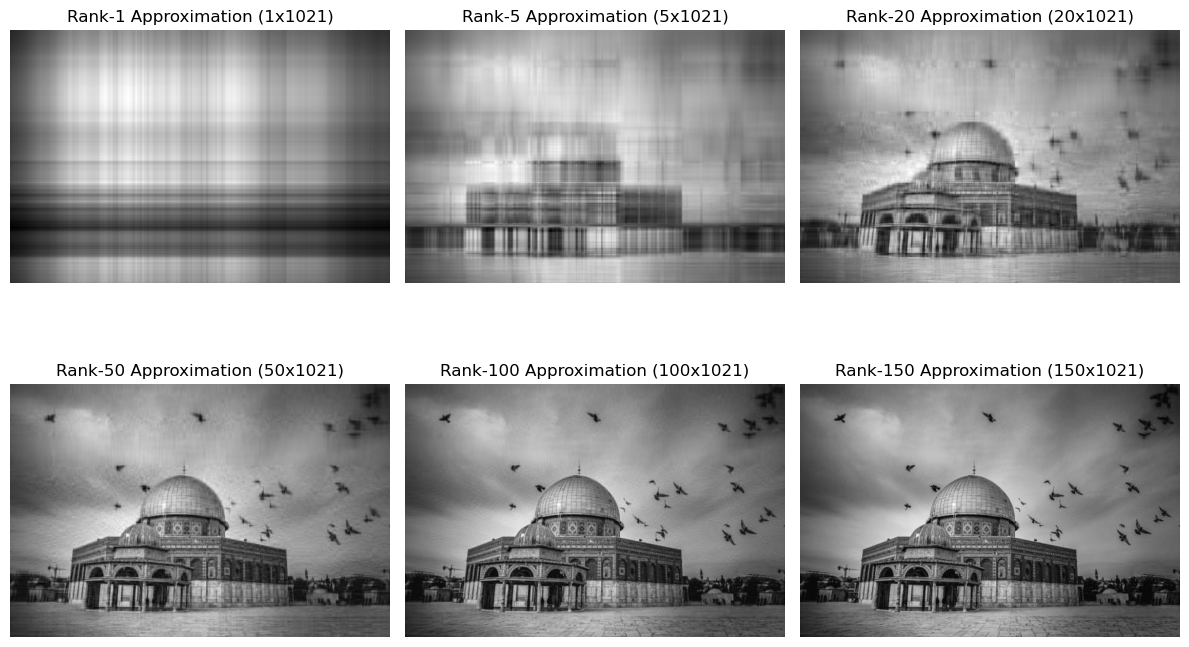

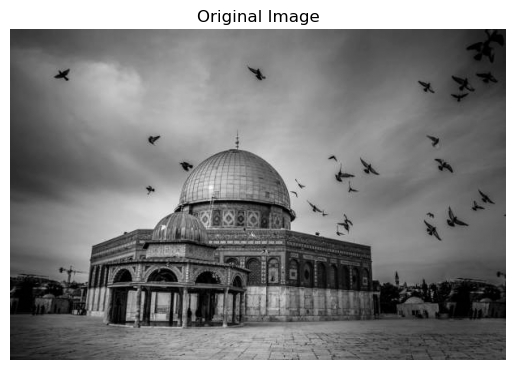

In [32]:
ranks=[1,5,20,50,100,150]

plt.figure(figsize=(12, 8))
shape=A.shape[0]+A.shape[1]+1

for i,k in enumerate(ranks):
    A_k=k_approx(U, S, Vt, k)

    plt.subplot(2, 3, i + 1)
    plt.imshow(A_k, cmap='gray')
    plt.title(f"Rank-{k} Approximation ({k}x{shape})")
    #plt.xlabel(f"Size : {k}x{shape}")
    plt.xticks([])
    plt.yticks([]) #to remove tick marks from the 2 axes
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.imshow(A, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

### 4. Analysing compressions :

After performing several low-rank approximations of the image matrix, we observe that increasing the rank $k$ leads to a progressively clearer reconstruction of the image. However, this comes at the cost of increased storage and computational complexity. By choosing a rank $k$ that balances visual clarity and matrix size, we can achieve an efficient representation of the data.
This trade-off is particularly important in machine learning and data processing tasks: using a lower-rank approximation can significantly reduce memory usage, speed up computations, and even help in reducing noise or irrelevant details. When well understood and properly tuned, low-rank approximations can act as a powerful dimensionality reduction tool, improving training times and potentially enhancing generalization by eliminating redundant or uninformative features.

**IMPORTANT :** We can know how to get the best k value for approximation manually depending on the Eckart-Young theorem , since :
$$
||A-\hat{A}(k)||_2=\sigma_{k+1}
$$
by other words , the error rate is the $k+1^{th}$ singular value , then we will attempt to visualize the $\sigma$s and see where their values drop sharply (the elbow point)

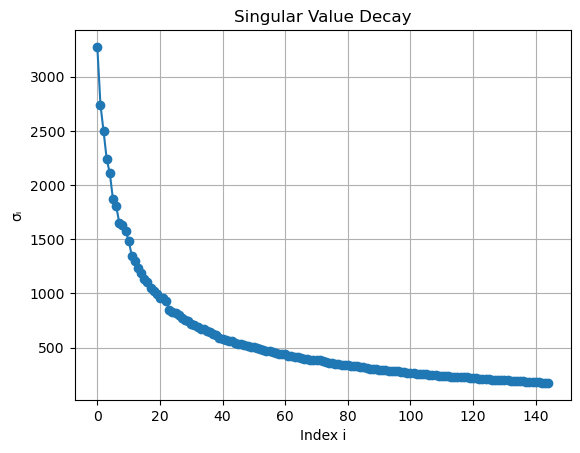

In [28]:
plt.plot(S[5:150], marker='o')
plt.title("Singular Value Decay")
plt.xlabel("Index i")
plt.ylabel("σᵢ")
plt.grid(True)
plt.show()


We can observe that plot drops sharply arround 20 , which is also remarquable in visualising the images resulted from approximations that starting from the `k=20` , the image becomes clear enough and gets the same aspect as the original image with a size of $20 \times 1021$ (the size of the $\hat{A}(k)$ is $k \times (m+n+1)$), this could be a good size on the memory to deal with while training the model